<a href="https://colab.research.google.com/github/manujism/1F_Drawing_Simulations/blob/main/Simulation_%26_Optimization_Code%202209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Successfully loaded 'Monthly Returns Aug15-Jul25.xlsx' ---

Enter the client's current corpus (initial investment): 5000000
-> Initial Corpus set to ₹5,000,000.
Enter the net starting monthly SIP: 30000
-> Starting Monthly SIP set to ₹30,000.
Enter your target corpus amount: 15000000
-> Target Corpus set to ₹15,000,000.

Do you want to apply an annual Step-up SIP? (yes/no): yes
Enter the annual step-up percentage (e.g., 10 for 10%): 10
-> Annual SIP step-up set to 10.0%.

Enter the length of the Growth Phase in months (0 to 120): 108
-> Growth Phase set to 108 months.
-> Preservation/Debt Phase will be 12 months.

--- Define Your Initial Corpus Portfolio ---
Available assets:
  [1] Large Cap Index
  [2] Flexi Cap
  [3] Mid Cap
  [4] Small Cap
  [5] Sectoral
  [6] Aggressive Hybrid
  [7] Gold
  [8] Bitcoin
  [9] Debt

Enter the numbers for your Initial Corpus assets, separated by commas: 1,2,6,7
-> Initial Corpus assets selected: Large Cap Index, Flexi Cap, Aggressive Hybrid, Gold



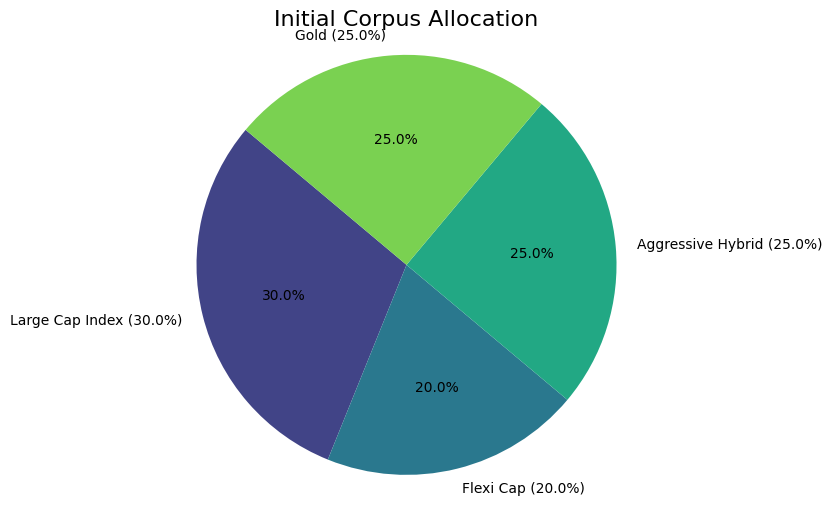

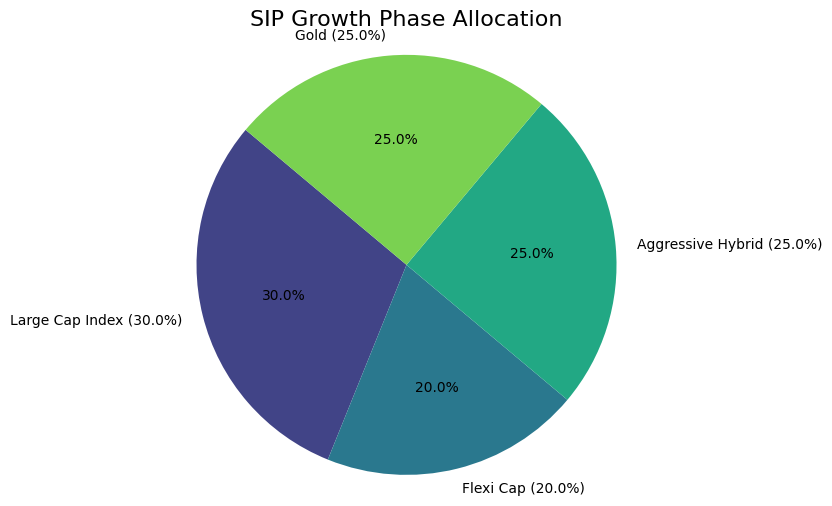

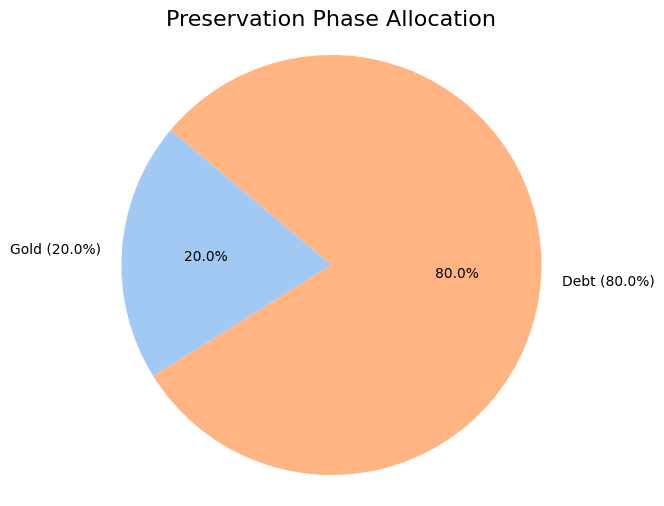

--- Year-wise Investment Growth Projection ---
 Year Annual SIP Total Investment 5th Percentile Value Median Value 95th Percentile Value
    1    ₹3.60 L         ₹53.60 L             ₹51.94 L     ₹59.47 L              ₹66.98 L
    2    ₹3.96 L         ₹57.56 L             ₹58.28 L     ₹70.22 L              ₹83.33 L
    3    ₹4.36 L         ₹61.92 L             ₹66.34 L     ₹82.60 L              ₹1.01 Cr
    4    ₹4.79 L         ₹66.71 L             ₹75.71 L     ₹96.49 L              ₹1.22 Cr
    5    ₹5.27 L         ₹71.98 L             ₹86.63 L     ₹1.13 Cr              ₹1.46 Cr
    6    ₹5.80 L         ₹77.78 L             ₹98.46 L     ₹1.31 Cr              ₹1.72 Cr
    7    ₹6.38 L         ₹84.15 L             ₹1.12 Cr     ₹1.53 Cr              ₹2.03 Cr
    8    ₹7.02 L         ₹91.17 L             ₹1.29 Cr     ₹1.77 Cr              ₹2.39 Cr
    9    ₹7.72 L         ₹98.89 L             ₹1.47 Cr     ₹2.04 Cr              ₹2.81 Cr
   10    ₹8.49 L         ₹1.07 Cr             ₹1.65 C

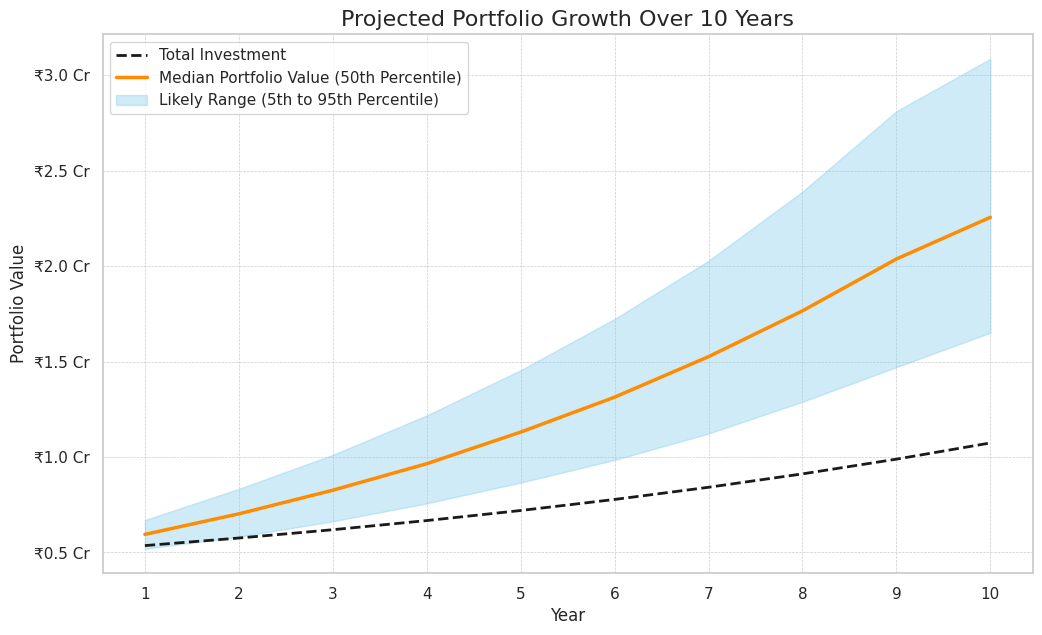

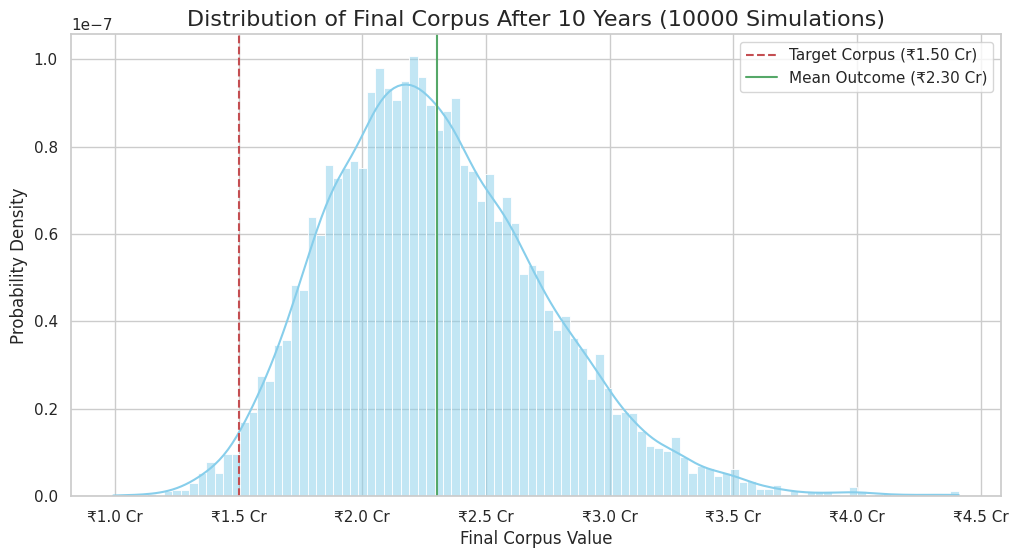

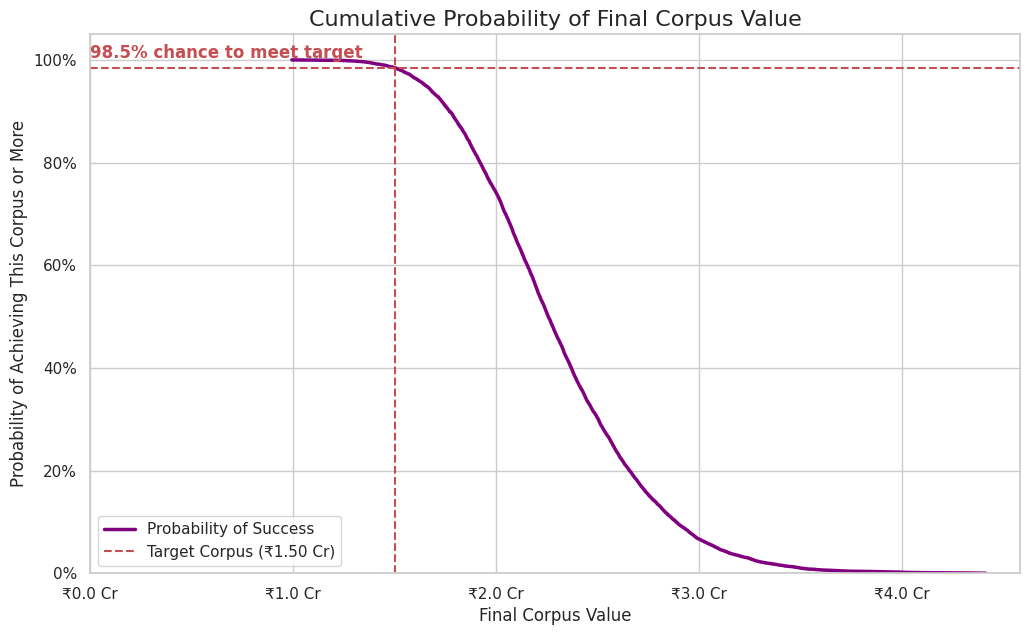

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


investment_horizon_months = 120
RISK_FREE_RATE_ANNUAL = 0.064

# --- Helper Function for Asset and Allocation Input ---
def get_portfolio_definition(portfolio_name, available_assets):
    """Gets asset selection and weights from the user for a given portfolio."""
    print(f"\n--- Define Your {portfolio_name} Portfolio ---")
    print("Available assets:")
    for i, asset in enumerate(available_assets, 1):
        print(f"  [{i}] {asset}")

    selected_assets = []
    while True:
        try:
            user_input_numbers = input(f"\nEnter the numbers for your {portfolio_name} assets, separated by commas: ")
            if not user_input_numbers.strip():
                if "Preservation" in portfolio_name and debt_phase_months == 0:
                        print("-> No preservation phase, skipping asset selection.")
                        return [], {}
                print(f"Error: You must select at least one asset for the {portfolio_name} portfolio.")
                continue
            selected_numbers = [int(num.strip()) for num in user_input_numbers.split(',')]
            invalid_numbers = [num for num in selected_numbers if not (1 <= num <= len(available_assets))]
            if invalid_numbers:
                print(f"Error: Invalid numbers: {invalid_numbers}. Please choose from the list.")
                continue
            unique_numbers = sorted(list(set(selected_numbers)))
            selected_assets = [available_assets[i-1] for i in unique_numbers]
            print(f"-> {portfolio_name} assets selected: {', '.join(selected_assets)}")
            break
        except ValueError:
            print("Invalid input. Please enter only numbers, separated by commas.")

    weights = {}
    while True:
        temp_weights = {}
        print(f"\nEnter the percentage allocation for each {portfolio_name} asset.")
        try:
            for asset in selected_assets:
                alloc_percent = float(input(f"  Allocation for {asset} (%): "))
                temp_weights[asset] = alloc_percent
            total_allocation = sum(temp_weights.values())
            if abs(total_allocation - 100.0) < 1e-9:
                weights = {k: v / 100.0 for k, v in temp_weights.items()}
                print(f"-> {portfolio_name} allocations accepted.")
                break
            else:
                print(f"\nError: Total allocation is {total_allocation}%. It must sum to 100%. Please try again.")
        except ValueError:
            print("\nInvalid input. Please enter numbers only.")
    return selected_assets, weights


def analyze_portfolio_metrics(weights, assets, name, monthly_returns_df, risk_free_rate_annual):
    """Calculates and prints key performance and risk metrics for a defined portfolio."""
    if not weights or not assets:
        print(f"\n--- No assets defined for {name}, skipping analysis. ---")
        return

    print(f"\n--- {name} - Historical Performance Analysis ---")


    portfolio_returns = monthly_returns_df[assets].dot(pd.Series(weights))


    mean_monthly_return = portfolio_returns.mean()
    annualized_mean_return = ((1 + mean_monthly_return) ** 12) - 1

    std_dev_monthly = portfolio_returns.std()
    annualized_volatility = std_dev_monthly * np.sqrt(12)

    risk_free_rate_monthly = (1 + risk_free_rate_annual)**(1/12) - 1


    if std_dev_monthly > 0:
        sharpe_ratio = (mean_monthly_return - risk_free_rate_monthly) / std_dev_monthly
        annualized_sharpe_ratio = sharpe_ratio * np.sqrt(12)
    else:
        annualized_sharpe_ratio = np.inf # If no volatility, ratio is infinite


    num_months = len(portfolio_returns)
    if num_months > 0:
        num_years = num_months / 12
        ending_value = (1 + portfolio_returns).prod()
        cagr = (ending_value)**(1 / num_years) - 1
    else:
        cagr = 0

    best_month = portfolio_returns.max()
    worst_month = portfolio_returns.min()

    print(f"Annualized Mean Return: {annualized_mean_return:.2%}")
    print(f"CAGR (Compound Annual Growth Rate): {cagr:.2%}")
    print(f"Annualized Volatility (Std. Dev.): {annualized_volatility:.2%}")
    print(f"Annualized Sharpe Ratio (vs {risk_free_rate_annual:.1%} RF): {annualized_sharpe_ratio:.2f}")
    print(f"Best Monthly Return: {best_month:.2%}")
    print(f"Worst Monthly Return: {worst_month:.2%}")

def display_correlation_matrix(assets, name, monthly_returns_df):
    """Calculates and prints the correlation matrix for selected assets."""
    if len(assets) > 1:
        print(f"\n--- Correlation Matrix for {name} Assets ---")
        correlation_matrix = monthly_returns_df[assets].corr()
        print(correlation_matrix.to_string())
        print("-" * 50)


try:
    # --- Load and Prepare Data ---
    file_name = 'Monthly Returns Aug15-Jul25.xlsx'
    returns_df = pd.read_excel(file_name)
    print(f"--- Successfully loaded '{file_name}' ---")

    returns_df.columns = returns_df.columns.str.strip()

    # --- Standardize Column Names ---
    column_mapping = {
        'Large Cap Index': 'Large Cap Index', 'Flexi Cap Funds': 'Flexi Cap',
        'Mid Cap Funds': 'Mid Cap', 'Small Cap Funds': 'Small Cap',
        'Sectoral Funds': 'Sectoral', 'Hybrid Funds': 'Aggressive Hybrid',
        'Gold': 'Gold', 'Bitcoin': 'Bitcoin', 'Debt': 'Debt'
    }
    returns_df.rename(columns=column_mapping, inplace=True)

    all_available_assets = list(column_mapping.values())

    # --- Pre-process all available asset data before user input ---
    for col in all_available_assets:
        if col in returns_df.columns:
            returns_df[col] = pd.to_numeric(returns_df[col], errors='coerce') / 100
    # Drop rows where ANY of the available assets have NaN, to ensure consistency
    returns_df.dropna(subset=all_available_assets, inplace=True)


    # 1. Get client's key financial parameters
    while True:
        try:
            initial_investment = float(input("\nEnter the client's current corpus (initial investment): "))
            if initial_investment >= 0:
                print(f"-> Initial Corpus set to ₹{initial_investment:,.0f}.")
                break
            else:
                print("Please enter a non-negative number.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    while True:
        try:
            monthly_sip = float(input("Enter the net starting monthly SIP: "))
            if monthly_sip >= 0:
                print(f"-> Starting Monthly SIP set to ₹{monthly_sip:,.0f}.")
                break
            else:
                print("Please enter a non-negative number.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    while True:
        try:
            target_corpus = float(input("Enter your target corpus amount: "))
            if target_corpus > 0:
                print(f"-> Target Corpus set to ₹{target_corpus:,.0f}.")
                break
            else:
                print("Please enter a positive number for the target corpus.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # 2. Ask about Step-up SIP
    step_up_enabled = False
    step_up_percent = 0.0
    while True:
        user_input = input("\nDo you want to apply an annual Step-up SIP? (yes/no): ").lower()
        if user_input in ['yes', 'y']:
            step_up_enabled = True
            while True:
                try:
                    step_up_percent = float(input("Enter the annual step-up percentage (e.g., 10 for 10%): "))
                    if step_up_percent >= 0:
                        print(f"-> Annual SIP step-up set to {step_up_percent}%.")
                        break
                    else:
                        print("Please enter a positive number.")
                except ValueError:
                    print("Invalid input. Please enter a number.")
            break
        elif user_input in ['no', 'n']:
            print("-> No Step-up SIP will be applied.")
            break
        else:
            print("Invalid input. Please enter 'yes' or 'no'.")

    # 3. Get Phase Lengths from User
    while True:
        try:
            growth_phase_months = int(input(f"\nEnter the length of the Growth Phase in months (0 to {investment_horizon_months}): "))
            if 0 <= growth_phase_months <= investment_horizon_months:
                debt_phase_months = investment_horizon_months - growth_phase_months
                print(f"-> Growth Phase set to {growth_phase_months} months.")
                print(f"-> Preservation/Debt Phase will be {debt_phase_months} months.")
                break
            else:
                print(f"Invalid input. Please enter a number between 0 and {investment_horizon_months}.")
        except ValueError:
            print("Invalid input. Please enter a whole number.")

    # 4. Get Allocations and Run Analysis for Each Portfolio
    selected_assets_corpus, weights_corpus = get_portfolio_definition("Initial Corpus", all_available_assets)
    display_correlation_matrix(selected_assets_corpus, "Initial Corpus", returns_df)

    selected_assets_growth, weights_growth = get_portfolio_definition("SIP Growth Phase", all_available_assets)
    analyze_portfolio_metrics(weights_growth, selected_assets_growth, "SIP Growth Portfolio", returns_df, RISK_FREE_RATE_ANNUAL)
    display_correlation_matrix(selected_assets_growth, "SIP Growth", returns_df)

    selected_assets_debt, weights_debt = [], {}
    if debt_phase_months > 0:
        selected_assets_debt, weights_debt = get_portfolio_definition("Preservation Phase (for all funds)", all_available_assets)
        analyze_portfolio_metrics(weights_debt, selected_assets_debt, "Preservation Portfolio", returns_df, RISK_FREE_RATE_ANNUAL)
        display_correlation_matrix(selected_assets_debt, "Preservation", returns_df)

    # 5. Get Number of Simulations from User
    while True:
        try:
            num_simulations = int(input("\nEnter the number of simulations to run (e.g., 10000): "))
            if num_simulations > 0:
                print(f"-> Number of simulations set to {num_simulations}.")
                break
            else:
                print("Please enter a positive number.")
        except ValueError:
            print("Invalid input. Please enter a whole number.")

    # --- Run Simulation ---
    print("\n--- Running Two-Phase Monte Carlo Simulation... ---")
    final_corpus_values = []
    yearly_paths = []

    for i in range(num_simulations):
        corpus_value = initial_investment
        sip_value = 0
        current_monthly_sip = monthly_sip
        simulation_path_yearly = []

        for total_month_index in range(investment_horizon_months):
            if step_up_enabled and total_month_index > 0 and total_month_index % 12 == 0:
                current_monthly_sip *= (1 + step_up_percent / 100.0)

            sip_value += current_monthly_sip
            random_month_returns = returns_df.sample(1).iloc[0]

            if total_month_index < growth_phase_months:
                corpus_return = sum(weights_corpus.get(asset, 0) * random_month_returns[asset] for asset in selected_assets_corpus)
                sip_return = sum(weights_growth.get(asset, 0) * random_month_returns[asset] for asset in selected_assets_growth)
                corpus_value *= (1 + corpus_return)
                sip_value *= (1 + sip_return)
            else:
                if selected_assets_debt:
                    preservation_return = sum(weights_debt.get(asset, 0) * random_month_returns[asset] for asset in selected_assets_debt)
                    corpus_value *= (1 + preservation_return)
                    sip_value *= (1 + preservation_return)

            if (total_month_index + 1) % 12 == 0:
                simulation_path_yearly.append(corpus_value + sip_value)

        final_corpus_values.append(corpus_value + sip_value)
        yearly_paths.append(simulation_path_yearly)

    print("--- Simulation Complete. --- \n")

    # --- Analyze and Visualize Results ---
    achieved_target_count = sum(1 for value in final_corpus_values if value >= target_corpus)
    probability_of_success = (achieved_target_count / num_simulations) * 100
    median_corpus = np.median(final_corpus_values)
    mean_corpus = np.mean(final_corpus_values)
    percentile_5th = np.percentile(final_corpus_values, 5)
    percentile_95th = np.percentile(final_corpus_values, 95)

    print("--- Simulation Results ---")
    print(f"Probability of achieving ₹{target_corpus/1e7:.2f} crores: {probability_of_success:.2f}%")
    print(f"Probability of NOT achieving the target: {100 - probability_of_success:.2f}%")
    print("-" * 30)
    print(f"Average Final Corpus: ₹{mean_corpus/1e7:.2f} crores")
    print(f"Median (50th Percentile) Final Corpus: ₹{median_corpus/1e7:.2f} crores")
    print(f"5th Percentile Corpus (Worst Case): ₹{percentile_5th/1e7:.2f} crores")
    print(f"95th Percentile Corpus (Best Case): ₹{percentile_95th/1e7:.2f} crores")
    print("\n")

    def plot_pie_chart(weights, title):
        if weights:
            plt.figure(figsize=(8, 6))
            palette = "viridis" if "Growth" in title or "Corpus" in title else "pastel"
            # Adjust labels to show percentage with one decimal point
            labels = [f'{k} ({v*100:.1f}%)' for k, v in weights.items()]
            plt.pie(weights.values(), labels=labels,
                    autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette, len(weights)))
            plt.title(title, fontsize=16)
            plt.axis('equal')
            plt.show()

    plot_pie_chart(weights_corpus, 'Initial Corpus Allocation')
    plot_pie_chart(weights_growth, 'SIP Growth Phase Allocation')
    if debt_phase_months > 0:
        plot_pie_chart(weights_debt, 'Preservation Phase Allocation')

    sns.set(style='whitegrid')
    print("--- Year-wise Investment Growth Projection ---")

    years = np.arange(1, (investment_horizon_months // 12) + 1)
    total_investment_path = []
    sip_contribution_path = []
    current_total_investment = initial_investment
    current_sip_amount_for_year = monthly_sip

    for year in years:
        total_sip_for_year = current_sip_amount_for_year * 12
        current_total_investment += total_sip_for_year
        total_investment_path.append(current_total_investment)
        sip_contribution_path.append(total_sip_for_year)
        if step_up_enabled:
            current_sip_amount_for_year *= (1 + step_up_percent / 100.0)

    yearly_paths_array = np.array(yearly_paths)

    if yearly_paths_array.size > 0:
        median_path = np.median(yearly_paths_array, axis=0)
        percentile_5_path = np.percentile(yearly_paths_array, 5, axis=0)
        percentile_95_path = np.percentile(yearly_paths_array, 95, axis=0)

        year_wise_df = pd.DataFrame({
            'Year': years, 'Annual SIP': sip_contribution_path,
            'Total Investment': total_investment_path, '5th Percentile Value': percentile_5_path,
            'Median Value': median_path, '95th Percentile Value': percentile_95_path
        })

        def format_inr(x):
            if x >= 1e7: return f'₹{x/1e7:.2f} Cr'
            return f'₹{x/1e5:.2f} L'

        display_df = year_wise_df.copy()
        for col in display_df.columns:
            if col != 'Year':
                display_df[col] = display_df[col].apply(format_inr)

        print(display_df.to_string(index=False))
        print("\n")

        plt.figure(figsize=(12, 7))
        plt.plot(years, year_wise_df['Total Investment'], 'k--', label='Total Investment', linewidth=2)
        plt.plot(years, year_wise_df['Median Value'], color='darkorange', label='Median Portfolio Value (50th Percentile)', linewidth=2.5)
        plt.fill_between(years, year_wise_df['5th Percentile Value'], year_wise_df['95th Percentile Value'], color='skyblue', alpha=0.4, label='Likely Range (5th to 95th Percentile)')
        plt.title(f'Projected Portfolio Growth Over {investment_horizon_months//12} Years', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Portfolio Value', fontsize=12)
        formatter = FuncFormatter(lambda x, pos: f'₹{x/1e7:.1f} Cr' if x > 0 else '₹0')
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.xticks(years)
        plt.legend(loc='upper left')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(final_corpus_values, kde=True, bins=100, color='skyblue', stat='density')
    plt.axvline(x=target_corpus, color='r', linestyle='--', label=f'Target Corpus (₹{target_corpus/1e7:.2f} Cr)')
    plt.axvline(x=mean_corpus, color='g', linestyle='-', label=f'Mean Outcome (₹{mean_corpus/1e7:.2f} Cr)')
    plt.title(f'Distribution of Final Corpus After {investment_horizon_months//12} Years ({num_simulations} Simulations)', fontsize=16)
    plt.xlabel('Final Corpus Value', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    formatter = FuncFormatter(lambda x, pos: f'₹{x/1e7:.1f} Cr')
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.legend()
    plt.show()

    sorted_corpus = np.sort(final_corpus_values)
    cumulative_prob = 1. - np.arange(len(sorted_corpus)) / float(len(sorted_corpus))
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(sorted_corpus, cumulative_prob, color='purple', linewidth=2.5, label='Probability of Success')
    ax.axvline(x=target_corpus, color='r', linestyle='--', label=f'Target Corpus (₹{target_corpus/1e7:.2f} Cr)')
    ax.axhline(y=probability_of_success / 100, color='r', linestyle='--')
    ax.set_xlim(left=0)
    ax.set_ylim(0, 1.05)
    ax.text(ax.get_xlim()[0], (probability_of_success / 100) + 0.02, f'{probability_of_success:.1f}% chance to meet target', color='r', fontweight='bold')
    ax.set_title('Cumulative Probability of Final Corpus Value', fontsize=16)
    ax.set_xlabel('Final Corpus Value', fontsize=12)
    ax.set_ylabel('Probability of Achieving This Corpus or More', fontsize=12)
    formatter_x = FuncFormatter(lambda x, pos: f'₹{x/1e7:.1f} Cr')
    formatter_y = FuncFormatter(lambda y, pos: f'{y*100:.0f}%')
    ax.xaxis.set_major_formatter(formatter_x)
    ax.yaxis.set_major_formatter(formatter_y)
    ax.grid(True)
    ax.legend()
    plt.show()

except FileNotFoundError:
    print(f"\nERROR: The file '{file_name}' was not found.")
    print("Please make sure the Excel file is in the same directory as the script.\n")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")



--- Configure Your Optimization Search ---

FIXED Parameters (from User Inputs):
  - Initial Corpus: ₹5,000,000 | Starting SIP: ₹30,000 | Target: ₹15,000,000
  - Growth Phase Tenure: 9.0 years (108 months)
  - Initial Corpus Allocation: {'Large Cap Index': 0.3, 'Flexi Cap': 0.2, 'Aggressive Hybrid': 0.25, 'Gold': 0.25}
  - Step-up SIP: Yes, at 10.0% annually.

--- Configure Fixed Allocations for 'SIP Growth' Portfolio ---
  -> No fixed allocations selected. All 'SIP Growth' assets will be optimized.

--- Configure Fixed Allocations for 'Preservation' Portfolio ---
  -> No fixed allocations selected. All 'Preservation' assets will be optimized.

--- Generating and Testing Scenarios ---
Total scenarios to test: 3146
Testing scenarios: 3146/3146 | Best Probability So Far: 100.00%
--- Optimization Complete in 7860.85 seconds ---

--- Top 3 Optimal Strategies Found ---

--- Rank #1 ---
  Probability of Success: 100.00%
  Optimal SIP Growth Allocation: {'Aggressive Hybrid': 0.6, 'Flexi Cap'

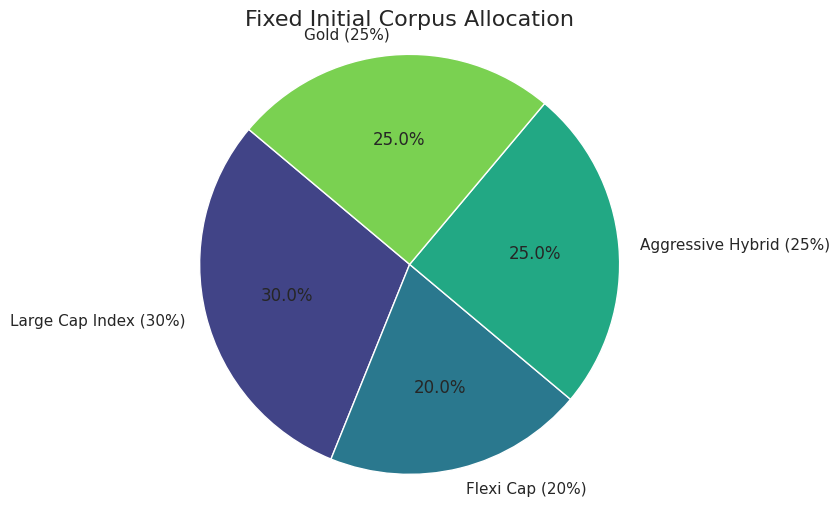

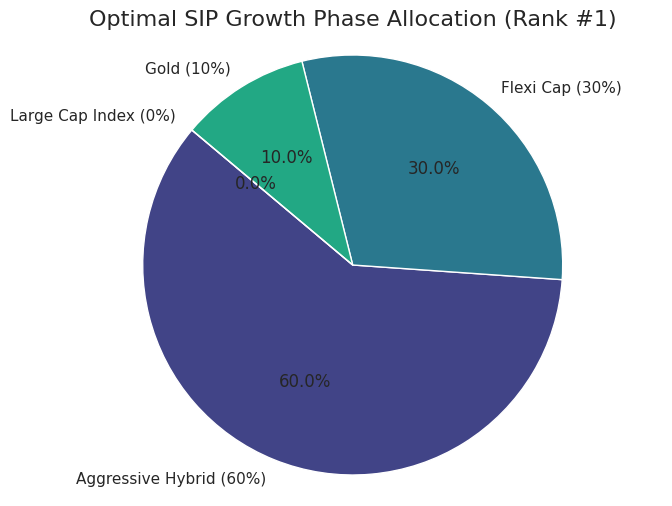

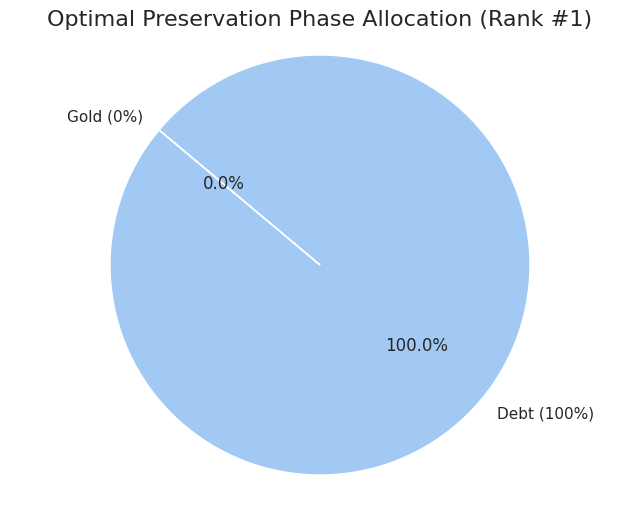


--- Year-wise Investment Growth Projection (Rank #1 Strategy) ---
 Year Annual SIP Total Investment 5th Percentile Value Median Value 95th Percentile Value
    1    ₹3.60 L         ₹53.60 L             ₹51.68 L     ₹59.59 L              ₹67.21 L
    2    ₹3.96 L         ₹57.56 L             ₹58.17 L     ₹70.40 L              ₹83.65 L
    3    ₹4.36 L         ₹61.92 L             ₹65.98 L     ₹83.13 L              ₹1.02 Cr
    4    ₹4.79 L         ₹66.71 L             ₹75.61 L     ₹97.61 L              ₹1.24 Cr
    5    ₹5.27 L         ₹71.98 L             ₹86.62 L     ₹1.14 Cr              ₹1.50 Cr
    6    ₹5.80 L         ₹77.78 L             ₹99.02 L     ₹1.34 Cr              ₹1.79 Cr
    7    ₹6.38 L         ₹84.15 L             ₹1.13 Cr     ₹1.57 Cr              ₹2.14 Cr
    8    ₹7.02 L         ₹91.17 L             ₹1.29 Cr     ₹1.83 Cr              ₹2.55 Cr
    9    ₹7.72 L         ₹98.89 L             ₹1.48 Cr     ₹2.12 Cr              ₹3.02 Cr
   10    ₹8.49 L         ₹1.07 Cr

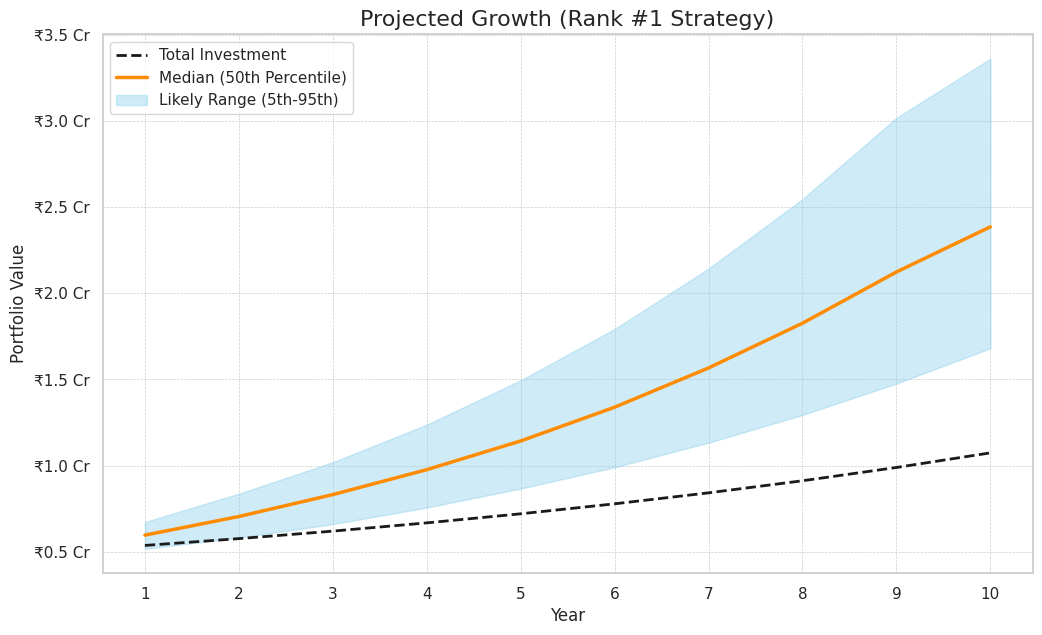

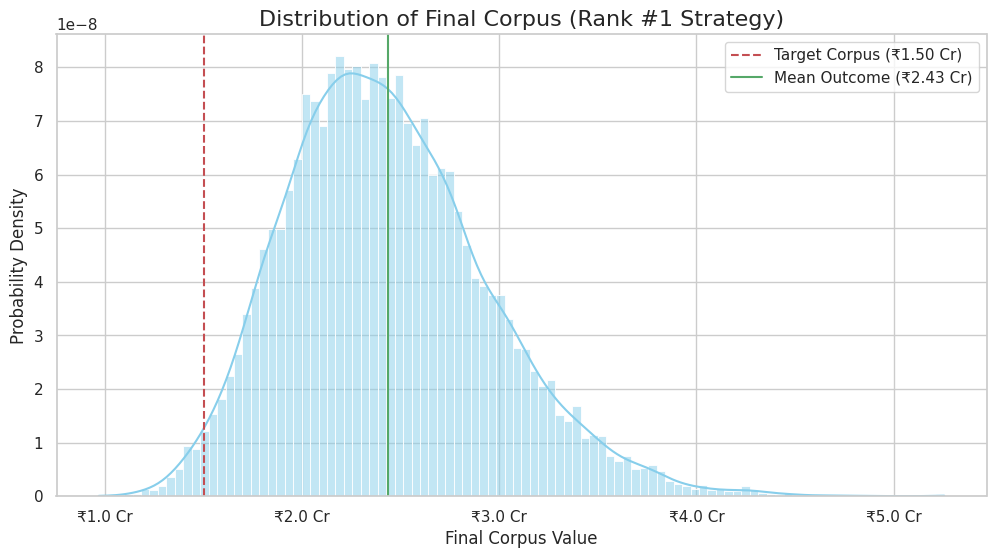

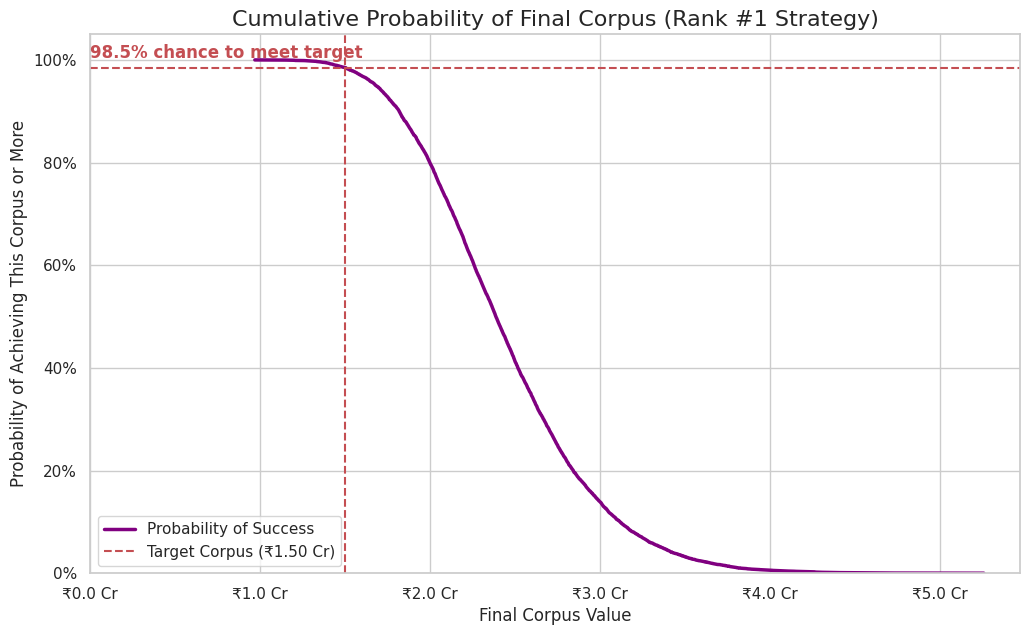

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import time
import itertools

# --- Static Parameters (will be overwritten by user inputs) ---
investment_horizon_months = 120

def run_simulation(
    weights_corpus, selected_assets_corpus,
    weights_growth, selected_assets_growth,
    weights_debt, selected_assets_debt,
    growth_phase_months, num_simulations, simulation_df,
    step_up_enabled, step_up_percent,
    initial_investment, monthly_sip, target_corpus,
    quiet=False
):
    """
    Runs a Monte Carlo simulation for the two-bucket strategy with row-based sampling.
    """
    debt_phase_months = investment_horizon_months - growth_phase_months
    final_corpus_values = []
    yearly_paths = []

    for i in range(num_simulations):
        corpus_value = initial_investment
        sip_value = 0
        current_monthly_sip = monthly_sip
        simulation_path_yearly = []

        for total_month_index in range(investment_horizon_months):
            if step_up_enabled and total_month_index > 0 and total_month_index % 12 == 0:
                current_monthly_sip *= (1 + step_up_percent / 100.0)

            sip_value += current_monthly_sip

            random_month_returns = simulation_df.sample(1).iloc[0]

            if total_month_index < growth_phase_months:
                corpus_return = sum(weights_corpus.get(asset, 0) * random_month_returns[asset] for asset in selected_assets_corpus)
                sip_return = sum(weights_growth.get(asset, 0) * random_month_returns[asset] for asset in selected_assets_growth)
                corpus_value *= (1 + corpus_return)
                sip_value *= (1 + sip_return)
            else:
                if selected_assets_debt:
                    preservation_return = sum(weights_debt.get(asset, 0) * random_month_returns[asset] for asset in selected_assets_debt)
                    corpus_value *= (1 + preservation_return)
                    sip_value *= (1 + preservation_return)

            if (total_month_index + 1) % 12 == 0:
                simulation_path_yearly.append(corpus_value + sip_value)

        final_corpus_values.append(corpus_value + sip_value)
        if not quiet:
            yearly_paths.append(simulation_path_yearly)

    achieved_target_count = sum(1 for value in final_corpus_values if value >= target_corpus)
    probability_of_success = (achieved_target_count / num_simulations) * 100
    return probability_of_success, final_corpus_values, yearly_paths


# --- MODIFICATION: Updated helper function for a better user experience ---
def get_fixed_allocations(asset_list, portfolio_name, step_percent):
    """
    Interactively asks the user to fix allocations for assets in a given list
    using a more efficient numbered-list approach.
    """
    fixed_allocations = {}
    total_fixed_percent = 0

    if not asset_list:
        return {}, []

    print(f"\n--- Configure Fixed Allocations for '{portfolio_name}' Portfolio ---")

    # Ask a single time if the user wants to fix any allocations for this portfolio
    while True:
        main_choice = input(f"Do you want to fix any asset allocations for '{portfolio_name}'? (y/n): ").lower()
        if main_choice in ['y', 'n']:
            break
        print("   Invalid input. Please enter 'y' or 'n'.")

    if main_choice == 'n':
        print(f"  -> No fixed allocations selected. All '{portfolio_name}' assets will be optimized.")
        return {}, asset_list

    # If yes, display assets and get the user's selection
    print("\nAssets available to fix:")
    for i, asset in enumerate(asset_list):
        print(f"  {i+1}: {asset}")

    selected_indices = []
    while True:
        try:
            index_str = input(f"\nEnter the number(s) of the assets to fix (e.g., 1 or 1,3): ")
            # Parse the comma-separated string, handling empty entries
            selected_indices = [int(i.strip()) - 1 for i in index_str.split(',') if i.strip()]

            # Validate that all numbers are within the valid range
            if all(0 <= i < len(asset_list) for i in selected_indices):
                break
            else:
                print(f"  ERROR: Invalid number(s). Please enter numbers between 1 and {len(asset_list)}.")
        except ValueError:
            print("  ERROR: Invalid input. Please enter only numbers, separated by commas.")

    # Loop ONLY through the selected assets to get their percentages
    for index in selected_indices:
        asset = asset_list[index]
        while True:
            try:
                percent_str = input(f"  -> Enter fixed percentage for '{asset}' (multiple of {step_percent}%): ")
                percent = int(percent_str)
                if 0 <= percent <= 100 and percent % step_percent == 0:
                    if total_fixed_percent + percent > 100:
                        print(f"   ERROR: Total fixed percentage would exceed 100%. Current fixed total is {total_fixed_percent}%.")
                    else:
                        fixed_allocations[asset] = percent / 100.0
                        total_fixed_percent += percent
                        break
                else:
                    print(f"   Invalid input. Must be a whole number from 0-100 and a multiple of {step_percent}.")
            except ValueError:
                print("   Invalid input. Please enter a whole number.")

    # Determine which assets are left to be optimized
    assets_to_optimize = [asset for asset in asset_list if asset not in fixed_allocations]

    print(f"\nSummary for '{portfolio_name}':")
    if fixed_allocations:
        print(f"  - Fixed Allocations: { {k: f'{v:.0%}' for k, v in fixed_allocations.items()} }")
        print(f"  - Remaining assets to optimize for the other {100-total_fixed_percent}%: {assets_to_optimize}")

    return fixed_allocations, assets_to_optimize


def generate_allocations(assets, step_percent, total_percent=100):
    """
    Generates all possible allocation combinations for a list of assets for a given total percentage.
    """
    if not assets: return [{}]
    if len(assets) == 1: return [{assets[0]: total_percent / 100.0}]

    step = step_percent / 100.0
    total_steps = int(total_percent / step_percent)

    combinations = itertools.combinations_with_replacement(range(len(assets)), total_steps)
    allocations = []
    for combo in combinations:
        alloc = {asset: 0.0 for asset in assets}
        for i in combo:
            alloc[assets[i]] += step
        alloc_rounded = {k: round(v, 4) for k, v in alloc.items()}
        if abs(sum(alloc_rounded.values()) - (total_percent/100.0)) < 1e-9:
              allocations.append(alloc_rounded)

    return [dict(t) for t in {tuple(sorted(d.items())) for d in allocations}]


# --- OPTIMIZATION SCRIPT ---
required_vars = [
    'returns_df', 'initial_investment', 'monthly_sip', 'target_corpus',
    'step_up_enabled', 'step_up_percent', 'growth_phase_months',
    'selected_assets_corpus', 'weights_corpus', 'selected_assets_growth',
    'selected_assets_debt'
]
if all(var in locals() or var in globals() for var in required_vars):

    required_cols_opt = list(set(selected_assets_corpus) | set(selected_assets_growth) | set(selected_assets_debt))
    simulation_df_opt = returns_df[required_cols_opt].dropna().copy()

    print("\n--- Configure Your Optimization Search ---")
    print("\nFIXED Parameters (from User Inputs):")
    print(f"  - Initial Corpus: ₹{initial_investment:,.0f} | Starting SIP: ₹{monthly_sip:,.0f} | Target: ₹{target_corpus:,.0f}")
    print(f"  - Growth Phase Tenure: {growth_phase_months / 12:.1f} years ({growth_phase_months} months)")
    print(f"  - Initial Corpus Allocation: {weights_corpus}")
    print(f"  - Step-up SIP: {'Yes, at ' + str(step_up_percent) + '% annually' if step_up_enabled else 'No'}.")

    while True:
        try:
            step_percent_alloc = int(input("\nEnter the allocation step size in percent for the search (e.g., 10, 20, 25): "))
            if 1 <= step_percent_alloc <= 100 and 100 % step_percent_alloc == 0:
                break
            else:
                print("Please enter a value that is a divisor of 100 (e.g., 5, 10, 20, 25, 50).")
        except ValueError:
            print("Invalid input. Please enter a whole number.")

    fixed_growth_alloc, growth_assets_to_optimize = get_fixed_allocations(selected_assets_growth, 'SIP Growth', step_percent_alloc)
    fixed_debt_alloc, debt_assets_to_optimize = get_fixed_allocations(selected_assets_debt, 'Preservation', step_percent_alloc)

    remaining_growth_percent = 100 - sum(v * 100 for v in fixed_growth_alloc.values())
    remaining_debt_percent = 100 - sum(v * 100 for v in fixed_debt_alloc.values())

    print("\n--- Generating and Testing Scenarios ---")

    partial_growth_allocations = generate_allocations(growth_assets_to_optimize, step_percent_alloc, remaining_growth_percent)
    partial_debt_allocations = generate_allocations(debt_assets_to_optimize, step_percent_alloc, remaining_debt_percent)

    growth_allocations = [{**fixed_growth_alloc, **p} for p in partial_growth_allocations]
    debt_allocations = [{**fixed_debt_alloc, **p} for p in partial_debt_allocations]

    sims_for_opt = 100
    top_3_results = [] # Stores tuples of (probability, params)

    total_scenarios = len(growth_allocations) * len(debt_allocations)
    print(f"Total scenarios to test: {total_scenarios}")
    current_scenario = 0
    start_time = time.time()

    for g_alloc in growth_allocations:
        for d_alloc in debt_allocations:
            current_scenario += 1
            prob, _, _ = run_simulation(
                weights_corpus, selected_assets_corpus,
                g_alloc, selected_assets_growth,
                d_alloc, selected_assets_debt,
                growth_phase_months, sims_for_opt, simulation_df_opt,
                step_up_enabled, step_up_percent,
                initial_investment, monthly_sip, target_corpus,
                quiet=True
            )

            current_params = {'growth_alloc': g_alloc, 'debt_alloc': d_alloc}
            if len(top_3_results) < 3:
                top_3_results.append((prob, current_params))
                top_3_results.sort(key=lambda x: x[0], reverse=True)
            elif prob > top_3_results[-1][0]:
                top_3_results[-1] = (prob, current_params)
                top_3_results.sort(key=lambda x: x[0], reverse=True)

            best_prob_so_far = top_3_results[0][0] if top_3_results else -1
            print(f"\rTesting scenarios: {current_scenario}/{total_scenarios} | Best Probability So Far: {best_prob_so_far:.2f}%", end="")

    end_time = time.time()
    print(f"\n--- Optimization Complete in {end_time - start_time:.2f} seconds ---")

    if not top_3_results:
        print("\nNo optimal strategy found.")
    else:
        print("\n--- Top 3 Optimal Strategies Found ---")
        for i, (prob, params) in enumerate(top_3_results):
            print(f"\n--- Rank #{i+1} ---")
            print(f"  Probability of Success: {prob:.2f}%")
            print(f"  Optimal SIP Growth Allocation: {params['growth_alloc']}")
            print(f"  Optimal Preservation Allocation: {params['debt_alloc']}")

        best_params = top_3_results[0][1]

        print("\n--- Running Final High-Fidelity Simulation with RANK #1 Parameters... ---")
        num_simulations_final = 10000

        prob_final, final_corpus, final_paths = run_simulation(
            weights_corpus, selected_assets_corpus,
            best_params['growth_alloc'], selected_assets_growth,
            best_params['debt_alloc'], selected_assets_debt,
            growth_phase_months, num_simulations_final, simulation_df_opt,
            step_up_enabled, step_up_percent,
            initial_investment, monthly_sip, target_corpus
        )

        median_corpus = np.median(final_corpus)
        mean_corpus = np.mean(final_corpus)
        percentile_5th = np.percentile(final_corpus, 5)
        percentile_95th = np.percentile(final_corpus, 95)

        print("\n--- Final Simulation Results (Using Rank #1 Optimal Parameters) ---")
        print(f"Probability of achieving ₹{target_corpus/1e7:.2f} crores: {prob_final:.2f}%")
        print(f"Probability of NOT achieving the target: {100 - prob_final:.2f}%")
        print("-" * 30)
        print(f"Average Final Corpus: ₹{mean_corpus/1e7:.2f} crores")
        print(f"Median (50th Percentile) Final Corpus: ₹{median_corpus/1e7:.2f} crores")
        print(f"5th Percentile Corpus (Worst Case): ₹{percentile_5th/1e7:.2f} crores")
        print(f"95th Percentile Corpus (Best Case): ₹{percentile_95th/1e7:.2f} crores")

        def plot_pie_chart(weights, title):
            if weights:
                plt.figure(figsize=(8, 6))
                palette = "viridis" if "Growth" in title or "Corpus" in title else "pastel"
                plt.pie(weights.values(), labels=[f'{k} ({v:.0%})' for k, v in weights.items()],
                        autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette, len(weights)))
                plt.title(title, fontsize=16)
                plt.axis('equal')
                plt.show()

        plot_pie_chart(weights_corpus, 'Fixed Initial Corpus Allocation')
        plot_pie_chart(best_params['growth_alloc'], 'Optimal SIP Growth Phase Allocation (Rank #1)')
        plot_pie_chart(best_params['debt_alloc'], 'Optimal Preservation Phase Allocation (Rank #1)')

        print("\n--- Year-wise Investment Growth Projection (Rank #1 Strategy) ---")
        years = np.arange(1, (investment_horizon_months // 12) + 1)
        total_investment_path, sip_contribution_path, current_total_investment, current_year_sip = [], [], initial_investment, monthly_sip
        for year in years:
            total_sip_for_year = current_year_sip * 12
            current_total_investment += total_sip_for_year
            total_investment_path.append(current_total_investment)
            sip_contribution_path.append(total_sip_for_year)
            if step_up_enabled: current_year_sip *= (1 + step_up_percent / 100.0)

        yearly_paths_array = np.array(final_paths)
        if yearly_paths_array.size > 0:
            def format_inr(x):
                return f'₹{x/1e7:.2f} Cr' if x >= 1e7 else f'₹{x/1e5:.2f} L'

            year_wise_df = pd.DataFrame({
                'Year': years, 'Annual SIP': sip_contribution_path, 'Total Investment': total_investment_path,
                '5th Percentile Value': np.percentile(yearly_paths_array, 5, axis=0),
                'Median Value': np.median(yearly_paths_array, axis=0),
                '95th Percentile Value': np.percentile(yearly_paths_array, 95, axis=0)
            })
            display_df = year_wise_df.copy()
            for col in [c for c in display_df.columns if c != 'Year']: display_df[col] = display_df[col].apply(format_inr)
            print(display_df.to_string(index=False))

            plt.figure(figsize=(12, 7))
            plt.plot(years, year_wise_df['Total Investment'], 'k--', label='Total Investment', linewidth=2)
            plt.plot(years, year_wise_df['Median Value'], color='darkorange', label='Median (50th Percentile)', linewidth=2.5)
            plt.fill_between(years, year_wise_df['5th Percentile Value'], year_wise_df['95th Percentile Value'], color='skyblue', alpha=0.4, label='Likely Range (5th-95th)')
            plt.title('Projected Growth (Rank #1 Strategy)', fontsize=16)
            plt.xlabel('Year', fontsize=12); plt.ylabel('Portfolio Value', fontsize=12)
            plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'₹{x/1e7:.1f} Cr'))
            plt.xticks(years); plt.legend(loc='upper left'); plt.grid(True, which='both', linestyle='--', linewidth=0.5)
            plt.show()

        plt.figure(figsize=(12, 6))
        sns.histplot(final_corpus, kde=True, bins=100, color='skyblue', stat='density')
        plt.axvline(x=target_corpus, color='r', linestyle='--', label=f'Target Corpus (₹{target_corpus/1e7:.2f} Cr)')
        plt.axvline(x=mean_corpus, color='g', linestyle='-', label=f'Mean Outcome (₹{mean_corpus/1e7:.2f} Cr)')
        plt.title('Distribution of Final Corpus (Rank #1 Strategy)', fontsize=16)
        plt.xlabel('Final Corpus Value', fontsize=12); plt.ylabel('Probability Density', fontsize=12)
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'₹{x/1e7:.1f} Cr'))
        plt.legend(); plt.show()

        sorted_corpus = np.sort(final_corpus)
        cumulative_prob = 1. - np.arange(len(sorted_corpus)) / float(len(sorted_corpus))
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(sorted_corpus, cumulative_prob, color='purple', linewidth=2.5, label='Probability of Success')
        ax.axvline(x=target_corpus, color='r', linestyle='--', label=f'Target Corpus (₹{target_corpus/1e7:.2f} Cr)')
        ax.axhline(y=prob_final / 100, color='r', linestyle='--')
        ax.set_xlim(left=0); ax.set_ylim(0, 1.05)
        ax.text(ax.get_xlim()[0], (prob_final / 100) + 0.02, f'{prob_final:.1f}% chance to meet target', color='r', fontweight='bold')
        ax.set_title('Cumulative Probability of Final Corpus (Rank #1 Strategy)', fontsize=16)
        ax.set_xlabel('Final Corpus Value', fontsize=12); ax.set_ylabel('Probability of Achieving This Corpus or More', fontsize=12)
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'₹{x/1e7:.1f} Cr'))
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y*100:.0f}%'))
        ax.grid(True); ax.legend(); plt.show()
else:
    print("\nERROR: Required data from the first cell not found.")
    print("Please run the first cell to define your strategy before running this optimization cell.")
